# Part II - Prosper Loan Data Explanation
## by Maryam OYEYIOLA

## Investigation Overview


> I am interested in finding out which features contribute to the amount of loan a borrower gets. I can already assume some features like `IsBorrowerHomeowner` and `IncomeRange` contribute to how much loan is disburesed, but I am not sure of the extent. While features like `Recommendations` and `LoanOriginationQuarter` may probably have no effect of the amount disbursed, I am interested in finding that out as well. 

> A good amount of recommendations can go a long way in solidifying the decision of either giving an individual a loan or not

## Dataset Overview

> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

> This data [dictionary](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0) explains the variables in the data set.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
data = pd.read_csv('loan_data.csv')

In [3]:
ordinal_var_dict = {'LoanStatus': ['Current', 'Completed','FinalPaymentInProgress',  
                                   'Past Due (1-15 days)', 'Past Due (16-30 days)', 'Past Due (31-60 days)',
                                   'Past Due (61-90 days)', 'Past Due (91-120 days)', 
                                   'Past Due (>120 days)',  'Chargedoff', 'Defaulted','Cancelled'],
                    'ProsperRating (Alpha)': ['HR', 'E', 'D', 'C', 'B', 'A', 'AA'],
                    'ProsperScore': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
                    'LoanOriginationMonth': ['January', 'February', 'March', 'April', 'May', 
                                             'June', 'July', 'August', 'September', 
                                             'October', 'November', 'December'],
                    'LoanOriginationYear' : [2009, 2010, 2011, 2012, 2013, 2014],
                    'IncomeRange' : ['Not displayed', 'Not employed', '$0', '$1-24,999', 
                                     '$25,000-49,999', '$50,000-74,999','$75,000-99,999','$100,000+'],
                    'LoanOriginationQuarter': ['Q1','Q2','Q3','Q4']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_var_dict[var])
    data[var] = data[var].astype(ordered_var)

In [4]:
data.EmploymentStatus = data.EmploymentStatus.astype('category')
data.IsBorrowerHomeowner = data.IsBorrowerHomeowner.astype('category')
data.IncomeVerifiable = data.IncomeVerifiable.astype('category')
data['ListingCategory'] = data['ListingCategory'].astype('category')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Distribution of Loan Amount

>The loan amount with the highest frequency is between $1000-4000. While 35000 is the highest loan taken out by a borrower. The histogram is still right skewed, but has a multimodal distribution.

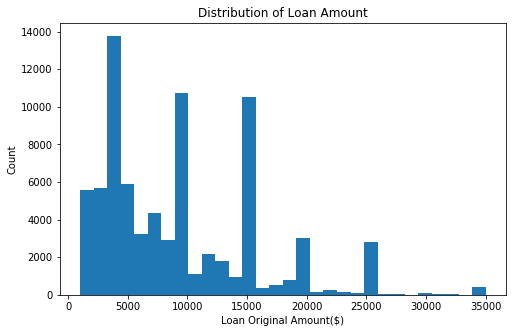

In [5]:
plt.figure(figsize=[8, 5])
plt.hist(data = data, x = 'LoanOriginalAmount', bins=30)
plt.xlabel('Loan Original Amount($)')
plt.ylabel('Count')
plt.title('Distribution of Loan Amount');

## Distribution of Monthly Loan Payment

> Outliers have been detected in the original data and the cleaned, the skeweness has been taken care of and the distribution now looks more spread across the x-axis. While we had a unimodal distribution initially, the new distribution turned out to be a bimodal distribution

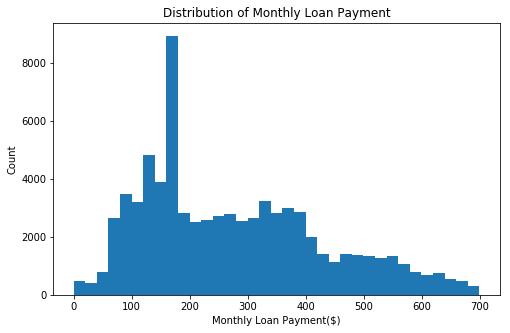

In [6]:
data_new = data[(data['MonthlyLoanPayment']<700)]

plt.figure(figsize=[8,5])
plt.hist(data = data_new, x = 'MonthlyLoanPayment', bins=35)
plt.xlabel('Monthly Loan Payment($)')
plt.ylabel('Count')
plt.title('Distribution of Monthly Loan Payment');

## Looking closely at the relationship between `MonthlyLoanPayment` and `LoanOriginalAmount`

> They are both right skewed and they share a 0.92% correlation

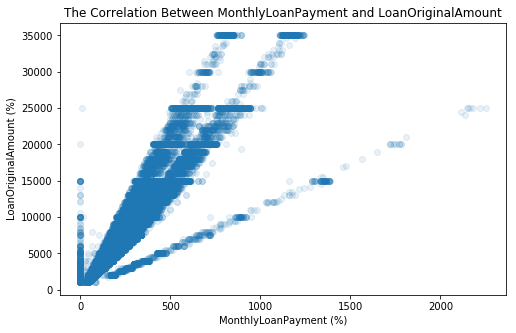

In [7]:
plt.figure(figsize=[8,5])
sb.regplot(data = data, x = 'MonthlyLoanPayment', y = 'LoanOriginalAmount', 
           fit_reg=False, x_jitter=0.3, scatter_kws=({'alpha':1/10}))
plt.xlabel('MonthlyLoanPayment (%)')
plt.ylabel('LoanOriginalAmount (%)')
plt.title('The Correlation Between MonthlyLoanPayment and LoanOriginalAmount');

## The distribution of `BorrowerAPR` and `BorrowerRate`
> The `BorrowerAPR` is the annual cost of a loan to a borrower which includes the `BorrowerRate` and the other costs that have accured on the load that year. I suspect the distribution will be similar to the distribution `BorrowerRate`

> Both histohrams do share a certain level of similarity. The x-axis limit of `BorrowerAPR` is higher than `BorrowerRate`. This can be as a result of the addition chargeges that have been `BorroweRate` to get the ` BorrowerAPR`. They might also share a positive correlation with each other.

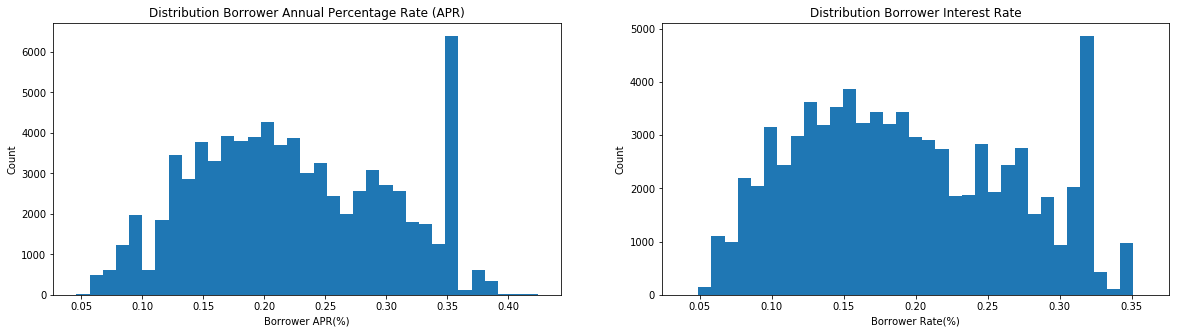

In [8]:
plt.figure(figsize = [20, 5])

plt.subplot(1, 2, 1)
plt.hist(data = data, x = 'BorrowerAPR', bins=35)
plt.xlabel('Borrower APR(%)')
plt.ylabel('Count')
plt.title('Distribution Borrower Annual Percentage Rate (APR)');

plt.subplot(1, 2, 2)
plt.hist(data = data, x = 'BorrowerRate', bins=35)
plt.xlabel('Borrower Rate(%)')
plt.ylabel('Count')
plt.title('Distribution Borrower Interest Rate');

## Which quarter of the year do people take out loans most?

>Most of the loan action occur at Q1 (January-March) and Q4 (October-December). Q1 has New Year's and is right before Easter while Q4 has Thansgiving and Christmas holidays. Could this be the reason why more people take out loans during these months?

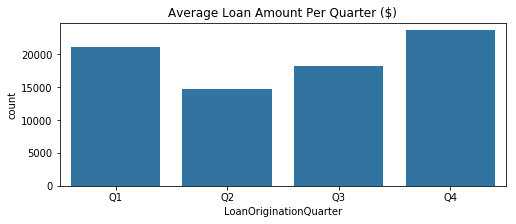

In [9]:
base_color = sb.color_palette()[0]

plt.figure(figsize=[8,3])
sb.countplot(data=data, x='LoanOriginationQuarter', color=base_color)
plt.title('Average Loan Amount Per Quarter ($)')
plt.show()

## Are there more high earners than there are low earners?

> About 90% of borrowers are employed and have taken out loans and earn at least 1-dolloar per year, while unemployed and self-employed people have not been able to take out any loans

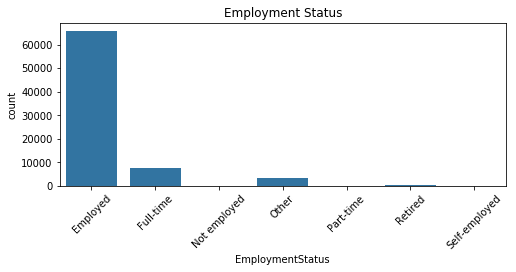

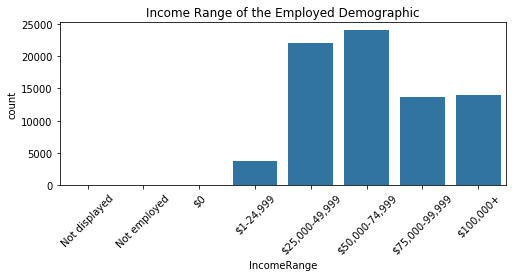

In [10]:
plt.figure(figsize=[8,3])
plt.xticks(rotation=45)
sb.countplot(data=data, x='EmploymentStatus', color=base_color)
plt.title('Employment Status')
plt.show()

plt.figure(figsize=[8,3])
plt.xticks(rotation=45)
sb.countplot(data=data, x='IncomeRange', color=base_color)
plt.title('Income Range of the Employed Demographic')
plt.show()

## What effect does the occupation of a borrower have on the loan amount they are granted?

> The professions that take out the highest amount of loan include **Pharmacy, Medicine(Doctor) and Jugde**. These professions do indeed hold a high prestige in the society. The average salary of anyone in any of the three professions is over ($)150,000

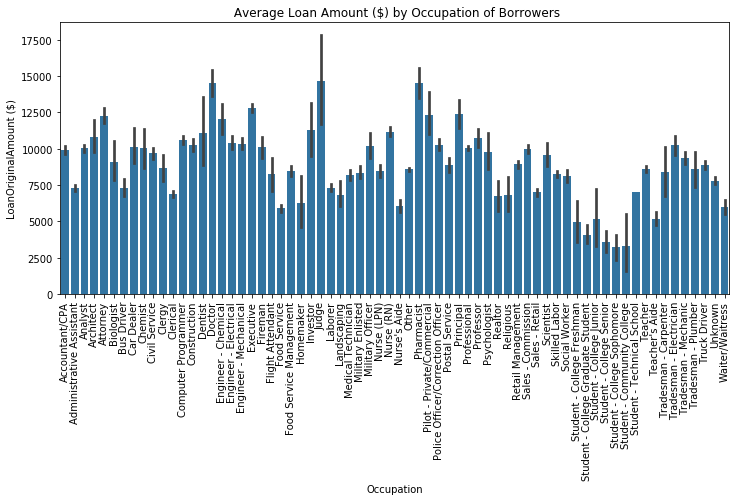

In [11]:
data2 = data.sort_values('Occupation')

plt.figure(figsize=[12,5])
sb.barplot(data=data2, x='Occupation', y='LoanOriginalAmount', color=base_color)
plt.xticks(rotation=90);
plt.ylabel('LoanOriginalAmount ($)')
plt.title(' Average Loan Amount ($) by Occupation of Borrowers');

## `LoanOriginalAmount` by `ProsperRating (Alpha)` and `IsBorrowerHomeowner`

Owning a property and not owning a property affects the loan amount just the same. And just as this does not affest either loan amount of prosper score, it dies not seem to affect the prosper rating as well.

In [12]:
loan_samp = data.sample(n=2000, replace = False)

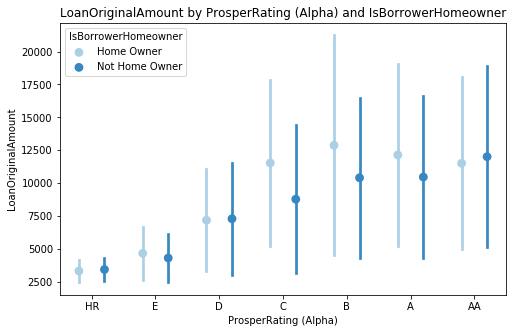

In [13]:
plt.figure(figsize = [8,5])
ax = sb.pointplot(data = loan_samp, x = 'ProsperRating (Alpha)', y = 'LoanOriginalAmount', hue = 'IsBorrowerHomeowner',
           palette = 'Blues', linestyles = "",dodge = 0.4, ci='sd')
plt.title('LoanOriginalAmount by ProsperRating (Alpha) and IsBorrowerHomeowner');

## `LoanOriginalAmount` by `ProsperScore` and `IncomeRange`

Employed borrowers do not only have better chances at securing a loan but they also have better chances at securing very high loan, especially high income earners whose income ranges from 75000 to 100000. Coupled with the high loan amount, they also get high prosper scores as well.

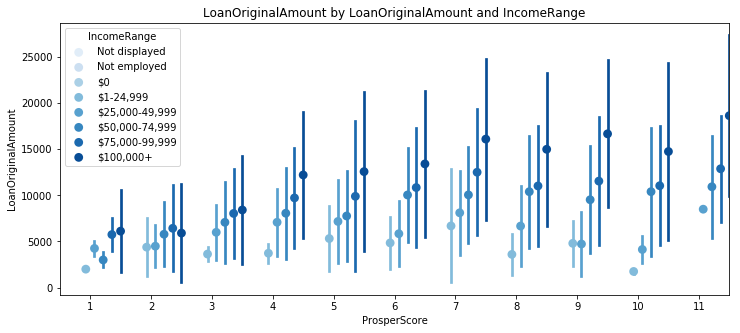

In [14]:
plt.figure(figsize = [12,5])
ax = sb.pointplot(data = loan_samp, x = 'ProsperScore', y = 'LoanOriginalAmount', hue = 'IncomeRange',
           palette = 'Blues', linestyles = "",dodge = 1, ci='sd')
plt.title('LoanOriginalAmount by LoanOriginalAmount and IncomeRange');

In [15]:
# Use this command if you are running this file in local
# !jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

In [16]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 594158 bytes to Part_II_slide_deck_template.slides.html
